## CSV to `GeoDataFrame`

Let's start importing packages and updating viewing options:

In [1]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all column when looking at dfs
pd.set_option('display.max.columns', None)
              
# Import power plant data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry = points, # Specify geometry column (new)
                                crs = 'EPSG:4269')  # Specify CRS
power_plants.head(1)                                

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)


In [4]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [5]:
# Explore CRS
print('CRS: ', power_plants.crs)
print('ellipsoid: ', power_plants.crs.ellipsoid)
print('datum: ', power_plants.crs.datum)
print('is the CRS geographic?: ', power_plants.crs.is_geographic)
print('is the CRS projected?: ', power_plants.crs.is_projected)

CRS:  EPSG:4269
ellipsoid:  GRS 1980
datum:  North American Datum 1983
is the CRS geographic?:  True
is the CRS projected?:  False


<Axes: >

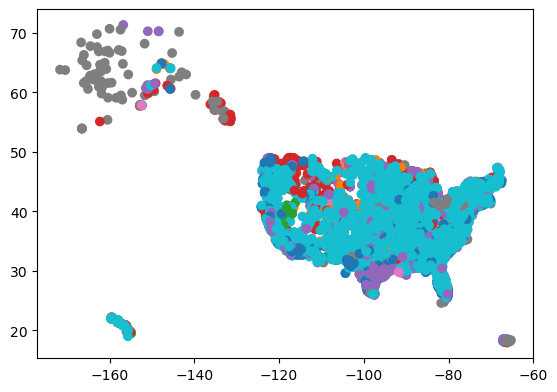

In [6]:
# Plot points and color them according to values in primsource column
power_plants.plot(column='primsource')  

## f-strings

So far, we have printed variables using string concatation inside the `print()` finction: we use commas to separate every variable and string that we want to print. Example:

In [7]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way to mix variables and strings in a rint statement is by creating a **f-string**, which stands for "formatted stirng".

the simpliest syntax:
```python
f"dome text {replace}"
```

where `replace` can be a variable, na expression, a functoin, or method call.

In [8]:
# Checck out what is the ellipsoid
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [9]:
# Use f-strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f-strings: a lot of customization for formatting output.

In [10]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS geographic?:   False


### Import a shapefile

In [11]:
# Print your current working directory
os.getcwd()

'/Users/scarroll/MEDS/EDS-220/EDS220-2024-in-class'

In [17]:
# Create an absolute file path to data
fp1 = os.path.join('/',
                  'courses',
                 'EDS220',
                 'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')

states1 = gpd.read_file(fp1)
# Simlipfy column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


In [18]:
# Import states data
fp = os.path.join('data', 'power_plants', 'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

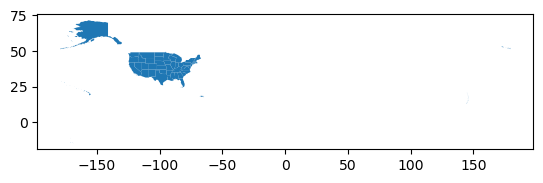

In [20]:
print(states.crs)
states.plot()

`for` loops

It can be easier to work withthe codes as numbers instead of strings, let's update the corresponding columns in the geo-dataframe:
`region`, `division`, `statefp`

First thing, check if these are columns wioth strings:

In [21]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"region is string dtype? {is_string_dtype(states['division'])}")
print(f"region is string dtype? {is_string_dtype(states['statefp'])}")




region is string dtype? True
region is string dtype? True
region is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name.
Instead, using a `for` loop allows to succinctly print the same info:

In [22]:
code_cols = ['region', 'division', 'statefp']

# Check whether code columns aree strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating pver a set of objects. In this case, we iterate over the list of column names.

**Dry code**

DRY = don't repeat yourself -- is a core programming principle that encourages reducing redundancy and consoliddating repeated logic.
If you need to repeat the 'same' code more than twice, you probably need a `for` loop.

Next, update data typpe of the code columns to be integers.
This time, we verify the data tupe of the column using the `is_numeric_dtype()` and `assert` statement:

In [23]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # Check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`.
If the expression evaluates to `False` the `assert` raises an `AssertionError` and stops your code form running.
Example:

In [25]:
# Does nothing if statement is True
assert 2 + 2 == 4

In [28]:
# This will return a `AssertionError` becuse it is False
assert 2 + 3 == 4

AssertionError: 

## Data selection

For this lesson, we want ot use only rhe contiguos states. The `states` geo-datafrmae covers a bigger extension.

<Axes: >

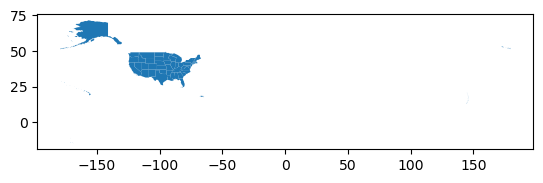

In [29]:
states.plot()

## Check-in
In this US Census Bureau file we can see what each code for the region, division, and state corresponds to.

- What are the unique values for region, division, or state codes in the data?
- Which codes should should we select to keep only states in the contiguous US?


In [31]:
states.region.unique()

array([3, 2, 1, 4, 9])

In [33]:
states.statefp.unique()

array([54, 12, 17, 27, 24, 44, 16, 33, 37, 50,  9, 10, 35,  6, 34, 55, 41,
       31, 42, 53, 22, 13,  1, 49, 39, 48,  8, 45, 40, 47, 56, 15, 38, 21,
       78, 69, 66, 23, 36, 32,  2, 60, 26,  5, 28, 29, 30, 20, 18, 72, 46,
       25, 51, 11, 19,  4])

Hawaii and Alaska have codes 2, 15, and then region 9 ahould also be excluded.

<Axes: >

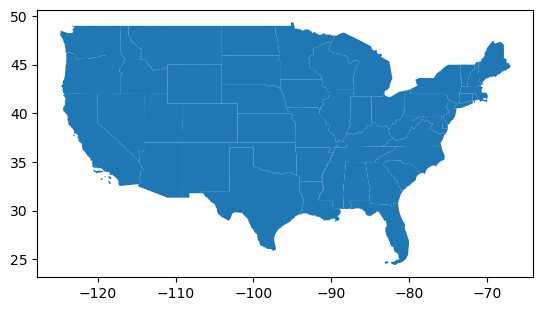

In [35]:
# Select contiguous US states
contiguous = states[ (states.region != 9) & (~states.statefp.isin([2,15]))] # The tilde negates the enitre statement
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement.

## Check-in
Select the data in the `power_plants` data frome for the contiguous US states

<Axes: >

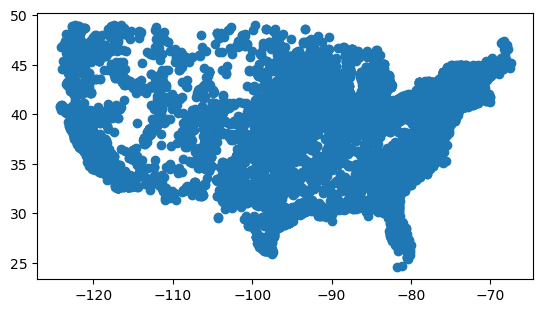

In [37]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

power_plants.plot()

## Plotting

Before we plot our dtaa, let's make sure they are in the same CRS:


In [38]:
contiguous.crs == power_plants.crs

True

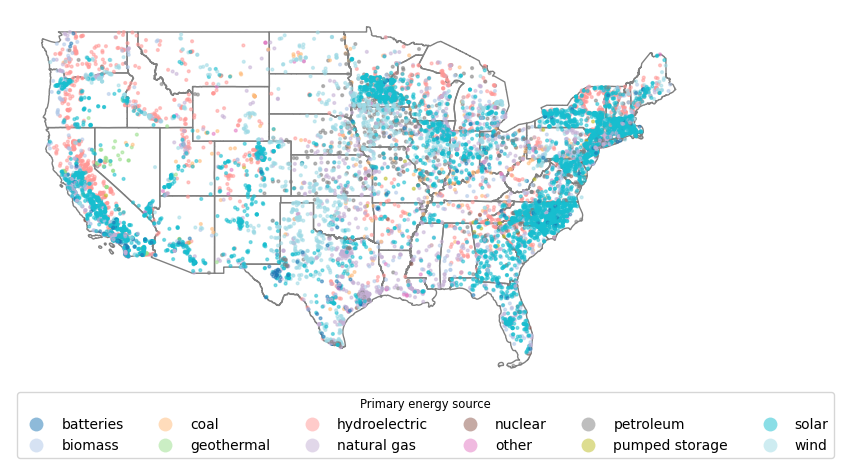

In [46]:
fig, ax = plt.subplots(figsize = (9,5))

# Remove axis for a cleaner map
ax.axis('off')

contiguous.plot(ax = ax,
               color = 'none',
               edgecolor = 'gray')

# Add electric power plants colored by energy source
power_plants.plot(ax = ax,
                 column = 'primsource', # Color by values in this column
                 legend = True,
                 markersize = 4,
                 cmap = 'tab20',
                 alpha = 0.5,
                 legend_kwds = { # kwds = keywords
                     'title': 'Primary energy source',
                     'title_fontsize' : 'small',
                     'loc' : 'upper left',
                     'bbox_to_anchor' : (0,0),
                     'ncol' : 6,
                 } 
                 )
plt.show()

We controlled the legend locatoin using `loc` and `bbox_to_anchor` in the `legend_kwds`:
- `loc` indicates the **corner of the legend that we want to use for placement**
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specifed in `loc` relative to trhe axes. Values between 0 and 1 are *inside* the axes